In [63]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import string

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Filip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
df = pd.read_csv('spam_ham_dataset.csv')

In [46]:
df.head(15)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [47]:
df['text'] = df['text'].apply(lambda x: x.replace('\r\n', ' '))

In [48]:
# df.text.iloc[2]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [50]:
stemmer = PorterStemmer()

corpus = []

stopwards_set = set(stopwords.words('english'))

for i in range(len(df)):
    text = df['text'].iloc[i].lower()
    text = text.translate(str.maketrans('', '', string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwards_set]
    text = ' '.join(text)
    corpus.append(text)

In [51]:
# corpus[0]

In [52]:
# Vecotisation

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()
y = df.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
clf = RandomForestClassifier(n_jobs=-1,)

clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [54]:
clf.score(X_test,y_test)

0.9748792270531401

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.96       293

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

[[730  12]
 [ 14 279]]


In [55]:
email_to_classify = df.text.values[10]

In [56]:
# email_to_classify

In [57]:
email_text = email_to_classify.lower().translate(str.maketrans('', '', string.punctuation)).split()
email_text = [stemmer.stem(word) for word in text if word not in stopwards_set]
email_text = ' '.join(email_text)

email_corpus = [email_text]

In [58]:
X_email = vectorizer.transform(email_corpus)

In [59]:
clf.predict(X_email)

array([1])

In [60]:
df.label_num.iloc[10]

np.int64(1)

In [61]:
df.label_num.iloc[12]

np.int64(0)

In [66]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwards_set]
    return ' '.join(text)

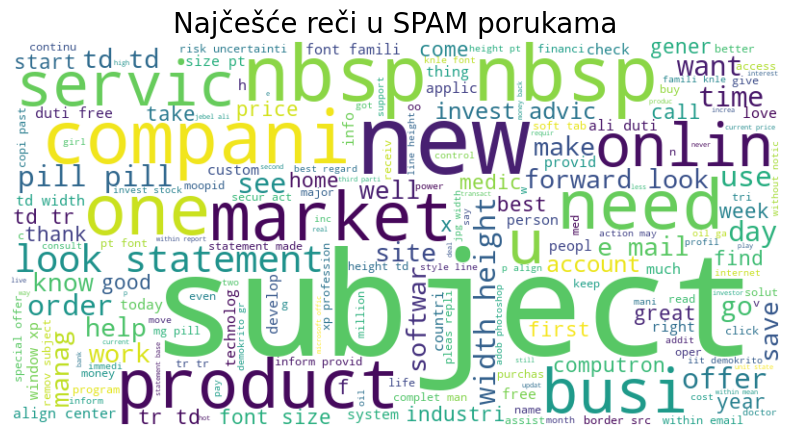

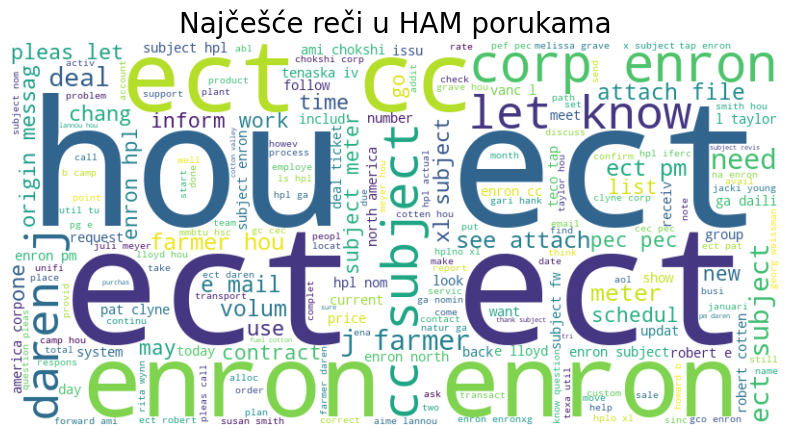

In [67]:
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()


spam_text = df[df['label_num'] == 1]['text'].apply(preprocess_text).str.cat(sep=' ')
ham_text = df[df['label_num'] == 0]['text'].apply(preprocess_text).str.cat(sep=' ')

plot_wordcloud(spam_text, 'Najčešće reči u SPAM porukama')

plot_wordcloud(ham_text, 'Najčešće reči u HAM porukama')


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['text'].apply(preprocess_text))
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       742
           1       0.96      0.99      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.98      0.98      0.98      1035

[[729  13]
 [  3 290]]
